<a href="https://colab.research.google.com/github/SerHol17/ClaseMaestria/blob/main/Pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

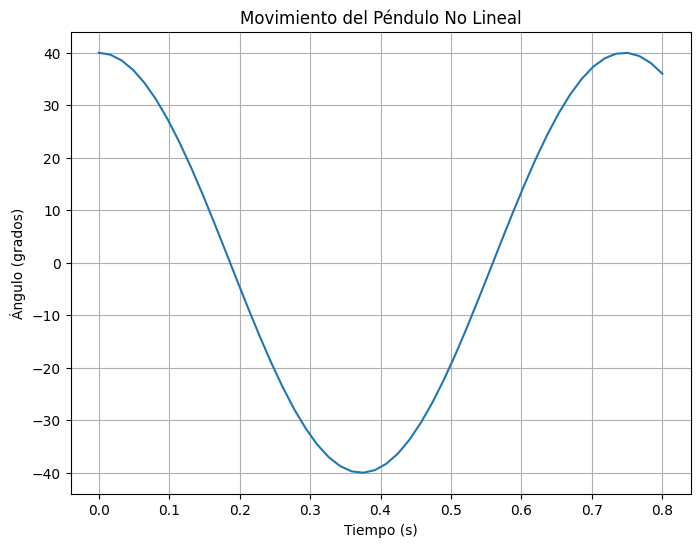

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros del péndulo (longitud y gravedad)
L = 0.13  # longitud del péndulo en metros
g = 9.81  # aceleración debido a la gravedad en m/s^2

# Ecuación diferencial del péndulo no lineal
def pendulum_nonlinear(state, t, L, g):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Condiciones iniciales: [ángulo inicial, velocidad angular inicial]
# Convertimos grados a radianes para el ángulo inicial
theta0 = [np.radians(40), 0.0]

# Tiempos en los que queremos resolver la ecuación diferencial
t = np.linspace(0, 0.8, 50)  # 10 segundos, 250 puntos

# Resolver la ecuación diferencial utilizando odeint
solution = odeint(pendulum_nonlinear, theta0, t, args=(L, g))

# Extraer la solución
angle, angular_velocity = solution[:, 0], solution[:, 1]

# Visualización del ángulo
plt.figure(figsize=(8, 6))
plt.plot(t, np.degrees(angle))
plt.title('Movimiento del Péndulo No Lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.grid(True)
plt.show()


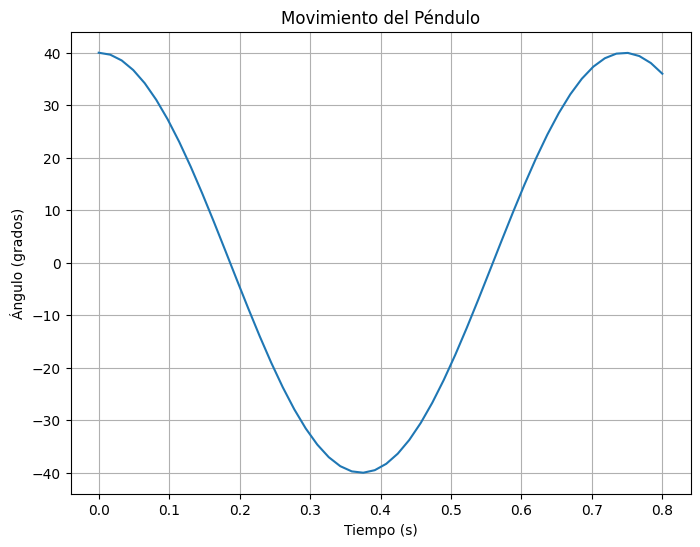

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


L = 0.13  # longitud mts
g = 9.81  # Gravedad


def pendulum(theta, t, L, g):
    dtheta_dt = theta[1]
    domega_dt = -(g / L) * np.sin(theta[0])
    return [dtheta_dt, domega_dt]

# Condiciones iniciales: [ángulo inicial, velocidad angular inicial]
# Convertimos grados a radianes
theta0 = [np.radians(40), 0.0]

# Tiempos en los que queremos resolver la ecuación diferencial
t = np.linspace(0, 0.8, 50)  # 10 segundos, 250 puntos

# Resolver la ecuación diferencial
solution = odeint(pendulum, theta0, t, args=(L, g))

# Extraer la solución
angle = solution[:, 0]

# Visualización
plt.figure(figsize=(8, 6))
plt.plot(t, np.degrees(angle))
plt.title('Movimiento del Péndulo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.grid(True)
plt.show()


In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("/content/Data_T010.xlsx")

In [3]:
df=pd.DataFrame(df)

Frecuencia angular natural ajustada: 7.539661459298349 grados/s


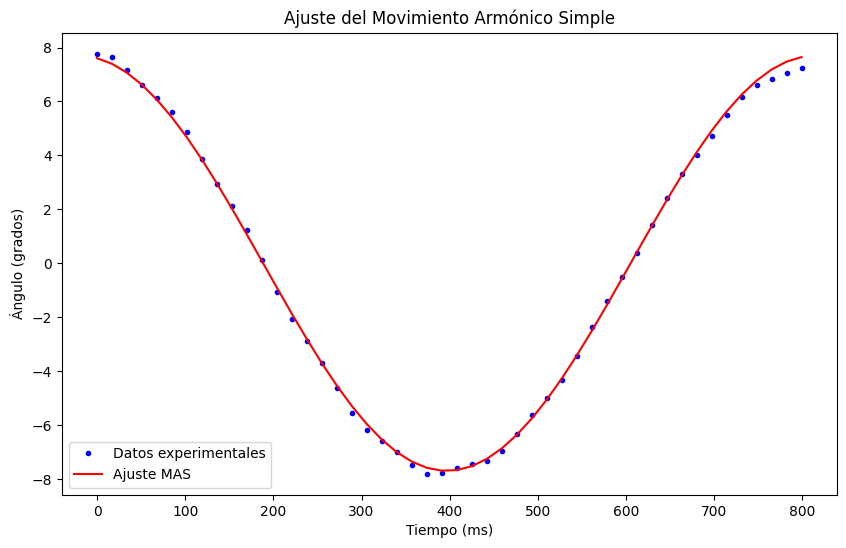

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que tienes un DataFrame df con tus datos
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y usa tu archivo de datos

# Esta es la función que describe el MAS, con el ángulo en grados
def mas(t, theta_m, omega_n, phi):
    # Convertir t de milisegundos a segundos
    t = t / 1000
    # Convertir omega_n de rad/s a ciclos/periodo y luego a grados
    omega_n = np.degrees(omega_n)
    return theta_m * np.sin(np.radians(omega_n * t + phi))

# Datos experimentales
# Asegúrate de reemplazar esto con tu DataFrame real
# times y angles deben estar en el mismo DataFrame
times = df["Tiempo (ms)"].to_numpy()  # Asegúrate de que los tiempos están en milisegundos
angles = df["Ãngulo 1"].to_numpy()    # Asegúrate de que los ángulos están en grados

# Ajuste de regresión no lineal
# Asumiendo que la frecuencia inicial está cerca de 2 * pi / T con T en milisegundos
popt, pcov = curve_fit(mas, times, angles, p0=[max(angles), 2 * np.pi / 0.8, 0])

theta_m_opt, omega_n_opt, phi_opt = popt

print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")

# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(times, mas(times, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()


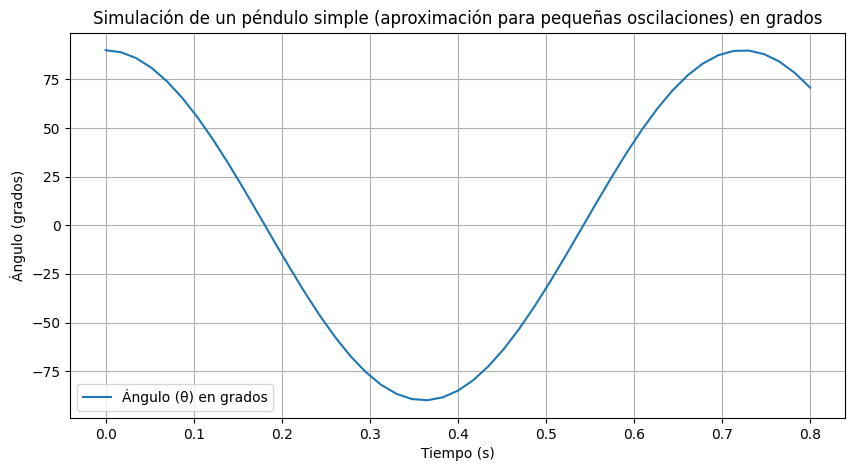

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
g = 9.81  # aceleración debido a la gravedad en m/s^2
l = 0.13   # longitud del péndulo en metros
theta_0_deg = 90 # ángulo inicial en grados
theta_0 = np.deg2rad(theta_0_deg)  # Convertir ángulo inicial a radianes
phi = 0  # fase inicial

# Función para calcular el ángulo en función del tiempo, resultado en grados
def theta_deg(t):
    return np.rad2deg(theta_0 * np.cos(np.sqrt(g / l) * t + phi))

# Crear un arreglo de valores de tiempo de 0 a 10 segundos
t = np.linspace(0, 0.8, 47)

# Calcular el ángulo correspondiente a cada momento, en grados
theta_t_deg = theta_deg(t)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t, theta_t_deg, label='Ángulo (θ) en grados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.title('Simulación de un péndulo simple (aproximación para pequeñas oscilaciones) en grados')
plt.grid(True)
plt.legend()
plt.show()


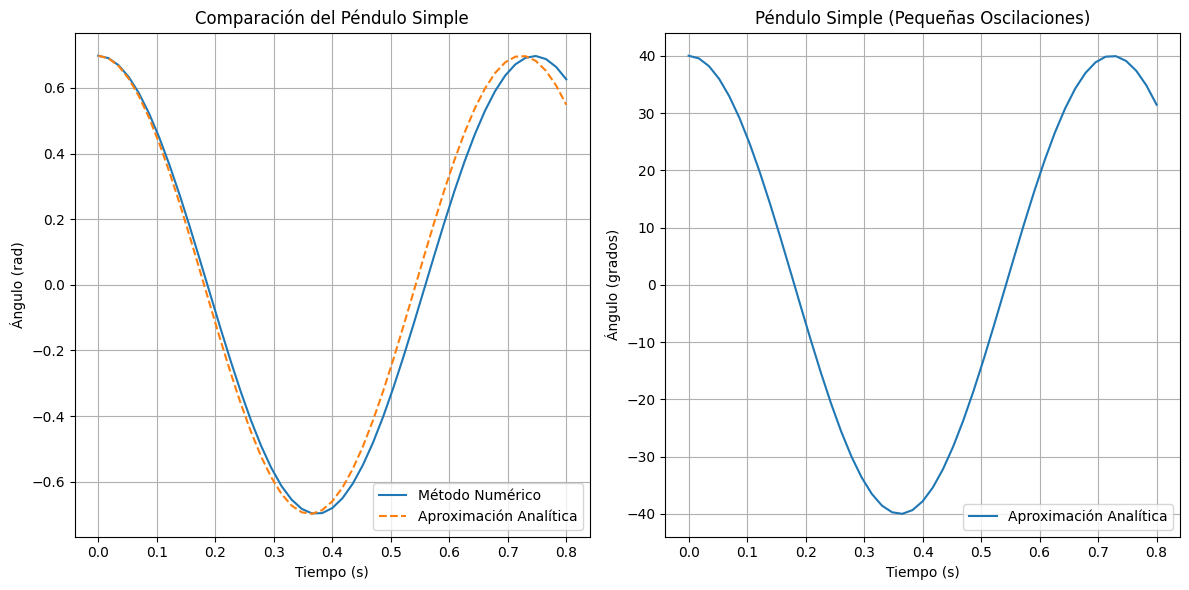

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
g = 9.81  # aceleración debido a la gravedad en m/s^2
l = 0.13   # longitud del péndulo en metros
theta_0_deg = 40  # ángulo inicial en grados para mostrar diferencias significativas
theta_0 = np.deg2rad(theta_0_deg)  # Convertir ángulo inicial a radianes
omega_0 = 0  # velocidad angular inicial en rad/s

# Función para el método numérico
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solución analítica
def theta_analytical(t):
    return theta_0 * np.cos(np.sqrt(g / l) * t)

# Tiempos
t_span = (0, 0.8)
t_eval = np.linspace(*t_span, 47)

# Solución numérica
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=t_eval)

# Gráfica del método numérico
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Método Numérico')
plt.plot(t_eval, theta_analytical(t_eval), '--', label='Aproximación Analítica')
plt.title('Comparación del Péndulo Simple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid(True)

# Gráfica de la aproximación analítica para pequeñas oscilaciones
plt.subplot(1, 2, 2)
plt.plot(t_eval, np.rad2deg(theta_analytical(t_eval)), label='Aproximación Analítica')
plt.title('Péndulo Simple (Pequeñas Oscilaciones)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



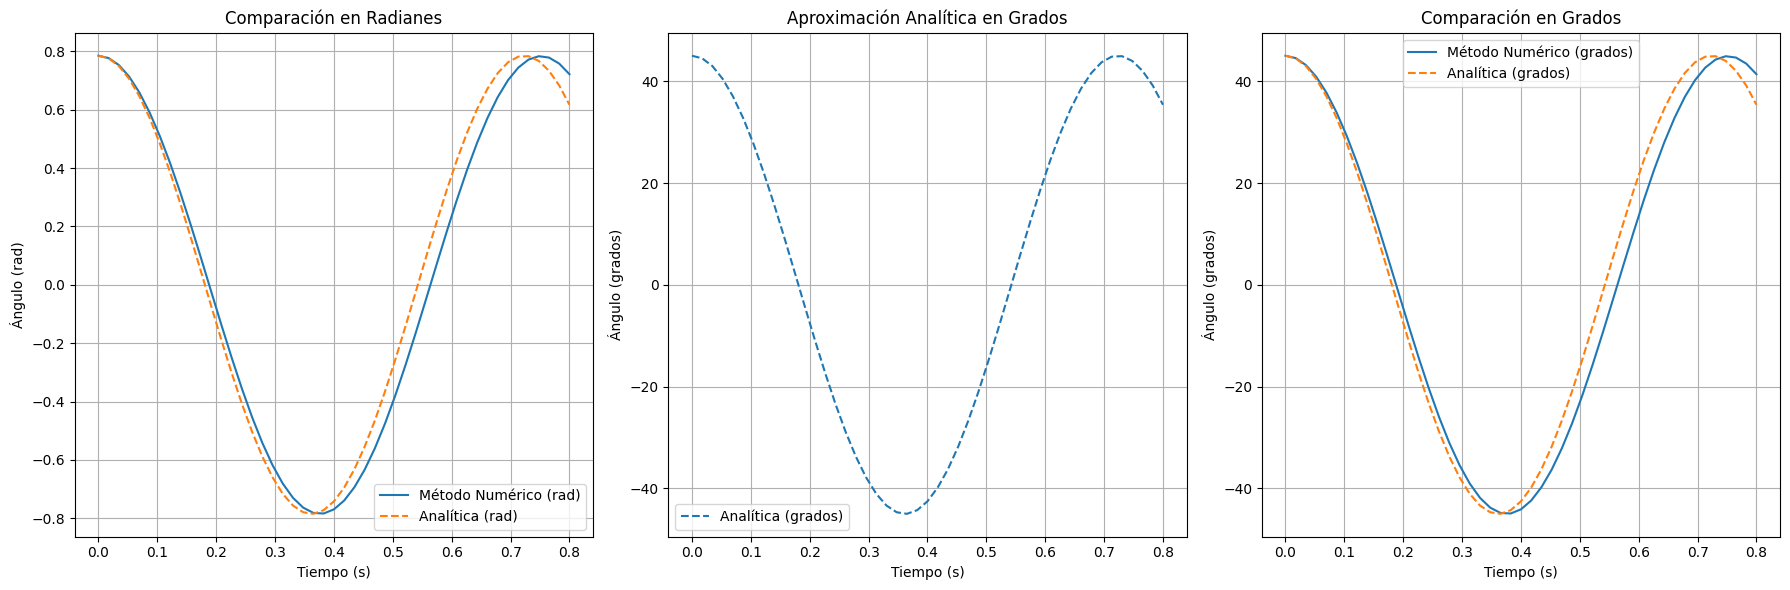

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
g = 9.81  # aceleración debido a la gravedad en m/s^2
l = 0.13   # longitud del péndulo en metros
theta_0_deg = 45  # ángulo inicial en grados para mostrar diferencias significativas
theta_0 = np.deg2rad(theta_0_deg)  # Convertir ángulo inicial a radianes
omega_0 = 0  # velocidad angular inicial

# Función para el método numérico
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solución analítica en radianes
def theta_analytical_rad(t):
    return theta_0 * np.cos(np.sqrt(g / l) * t)

# Solución analítica en grados
def theta_analytical_deg(t):
    return np.rad2deg(theta_0) * np.cos(np.sqrt(g / l) * t)

# Tiempos
t_span = (0, 0.8)
t_eval = np.linspace(*t_span, 47)

# Solución numérica
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=t_eval)

# Convertir la solución numérica a grados
sol_y_deg = np.rad2deg(sol.y[0])

# Gráfica de comparación en radianes
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(sol.t, sol.y[0], label='Método Numérico (rad)')
plt.plot(t_eval, theta_analytical_rad(t_eval), '--', label='Analítica (rad)')
plt.title('Comparación en Radianes')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid(True)

# Gráfica de la aproximación analítica en grados
plt.subplot(1, 3, 2)
plt.plot(t_eval, theta_analytical_deg(t_eval), '--', label='Analítica (grados)')
plt.title('Aproximación Analítica en Grados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)

# Gráfica de la solución numérica en grados
plt.subplot(1, 3, 3)
plt.plot(sol.t, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval), '--', label='Analítica (grados)')
plt.title('Comparación en Grados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
